In [2]:
%pip install faker

import pandas as pd
import numpy as np
from faker import Faker

# 初始化 Faker
fake = Faker()

# 生成模拟数据
data = {
    'CustomerID': np.arange(1, 101),
    'CustomerName': [fake.name() for _ in range(100)],
    'OrderDate': [fake.date_between(start_date='-2y', end_date='today') for _ in range(100)],
    'OrderAmount': np.random.randint(100, 1000, size=100),
    'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Home Appliances', 'Books'], size=100)
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 添加一些重复值
df = pd.concat([df, df.sample(10)], ignore_index=True)

# 添加一些缺失值
df.loc[np.random.choice(df.index, 10, replace=False), 'OrderAmount'] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), 'ProductCategory'] = np.nan

# 保存为 CSV 文件
df.to_csv('customer_orders.csv', index=False)

print("模拟的客户订单数据已保存为 customer_orders.csv")

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 1.9/1.9 MB 6.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
模拟的客户订单数据已保存为 customer_orders.csv


In [3]:
# 读取 CSV 文件
df = pd.read_csv('customer_orders.csv')

print("读取的客户订单数据：")
print(df.head())

读取的客户订单数据：
   CustomerID     CustomerName   OrderDate  OrderAmount ProductCategory
0           1    Kenneth Green  2023-03-07        556.0        Clothing
1           2      Craig Stark  2024-04-19        421.0           Books
2           3     Nathan Davis  2024-08-09        425.0           Books
3           4     Timothy Ward  2023-10-02        890.0        Clothing
4           5  Michael Johnson  2024-12-19        741.0             NaN


In [4]:
# 查找重复值
print("\n重复值：")
print(df[df.duplicated()])

# 删除重复值
df = df.drop_duplicates()

print("\n删除重复值后的数据：")
print(df.head())


重复值：
     CustomerID        CustomerName   OrderDate  OrderAmount  ProductCategory
102          79       Nicholas Dyer  2024-12-31        929.0            Books
103          51       Jessica Baird  2024-06-20        300.0            Books
104          15      Ashley Barrett  2023-05-08        596.0      Electronics
105          77       Jason Hoffman  2023-12-01        597.0            Books
106          65  Ashley Anderson MD  2023-05-20        786.0      Electronics
107          27       William Moore  2024-01-06        887.0  Home Appliances
108          16       Deborah Terry  2023-11-25        466.0      Electronics

删除重复值后的数据：
   CustomerID     CustomerName   OrderDate  OrderAmount ProductCategory
0           1    Kenneth Green  2023-03-07        556.0        Clothing
1           2      Craig Stark  2024-04-19        421.0           Books
2           3     Nathan Davis  2024-08-09        425.0           Books
3           4     Timothy Ward  2023-10-02        890.0        Clothin

In [5]:
# 查看缺失值
print("\n缺失值情况：")
print(df.isnull().sum())

# 填充缺失值
df['OrderAmount'].fillna(df['OrderAmount'].mean(), inplace=True)
df['ProductCategory'].fillna('Unknown', inplace=True)

print("\n填充缺失值后的数据：")
print(df.head())


缺失值情况：
CustomerID          0
CustomerName        0
OrderDate           0
OrderAmount        10
ProductCategory     5
dtype: int64

填充缺失值后的数据：
   CustomerID     CustomerName   OrderDate  OrderAmount ProductCategory
0           1    Kenneth Green  2023-03-07        556.0        Clothing
1           2      Craig Stark  2024-04-19        421.0           Books
2           3     Nathan Davis  2024-08-09        425.0           Books
3           4     Timothy Ward  2023-10-02        890.0        Clothing
4           5  Michael Johnson  2024-12-19        741.0         Unknown


C:\Users\林肖阳\AppData\Local\Temp\ipykernel_25428\1825815465.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OrderAmount'].fillna(df['OrderAmount'].mean(), inplace=True)
C:\Users\林肖阳\AppData\Local\Temp\ipykernel_25428\1825815465.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
# 创建客户基本信息数据集
customer_info_data = {
    'CustomerID': np.arange(1, 101),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Age': np.random.randint(18, 70, size=100)
}

# 创建 DataFrame
df_customer_info = pd.DataFrame(customer_info_data)

# 保存为 CSV 文件
df_customer_info.to_csv('customer_info.csv', index=False)

print("客户基本信息已保存为 customer_info.csv")

客户基本信息已保存为 customer_info.csv


In [7]:
# 读取客户基本信息
df_customer_info = pd.read_csv('customer_info.csv')

print("读取的客户基本信息：")
print(df_customer_info.head())

读取的客户基本信息：
   CustomerID  Gender  Age
0           1    Male   25
1           2  Female   38
2           3  Female   61
3           4    Male   57
4           5  Female   25


In [8]:
# 按 'CustomerID' 合并两个 DataFrame
df_merged = pd.merge(df, df_customer_info, on='CustomerID', how='left')

print("\n合并后的数据：")
print(df_merged.head())


合并后的数据：
   CustomerID     CustomerName   OrderDate  OrderAmount ProductCategory  \
0           1    Kenneth Green  2023-03-07        556.0        Clothing   
1           2      Craig Stark  2024-04-19        421.0           Books   
2           3     Nathan Davis  2024-08-09        425.0           Books   
3           4     Timothy Ward  2023-10-02        890.0        Clothing   
4           5  Michael Johnson  2024-12-19        741.0         Unknown   

   Gender  Age  
0    Male   25  
1  Female   38  
2  Female   61  
3    Male   57  
4  Female   25  


In [9]:
# 按 'ProductCategory' 分组并计算总订单金额
grouped = df_merged.groupby('ProductCategory')['OrderAmount'].sum()

print("\n按产品类别分组并计算总订单金额：")
print(grouped)


按产品类别分组并计算总订单金额：
ProductCategory
Books              13285.634409
Clothing           18336.268817
Electronics        17980.172043
Home Appliances     9978.634409
Unknown             2490.634409
Name: OrderAmount, dtype: float64


In [10]:
# 按 'Gender' 和 'Age' 分组并计算平均订单金额
grouped_gender_age = df_merged.groupby(['Gender', 'Age'])['OrderAmount'].mean()

print("\n按性别和年龄分组并计算平均订单金额：")
print(grouped_gender_age)


按性别和年龄分组并计算平均订单金额：
Gender  Age
Female  19     328.000000
        23     687.000000
        25     681.000000
        26     896.000000
        27     299.000000
                  ...    
Male    63     334.000000
        64     991.000000
        66     958.000000
        67     557.500000
        68     602.634409
Name: OrderAmount, Length: 72, dtype: float64


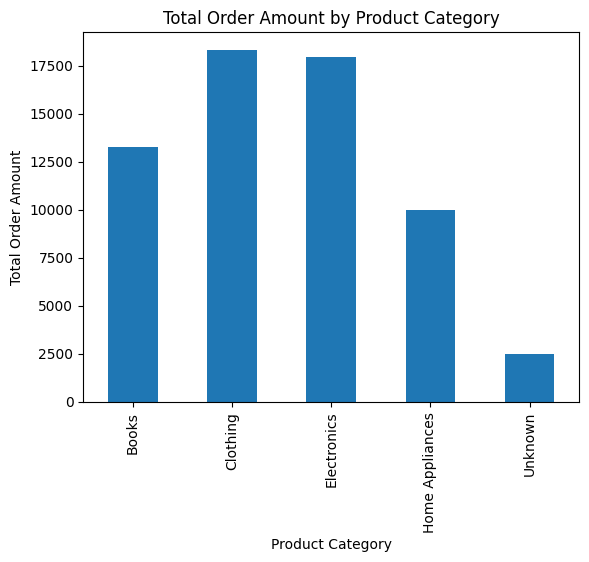

In [11]:
import matplotlib.pyplot as plt

# 绘制每个产品类别的订单金额柱状图
grouped.plot(kind='bar', title='Total Order Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Order Amount')
plt.show()

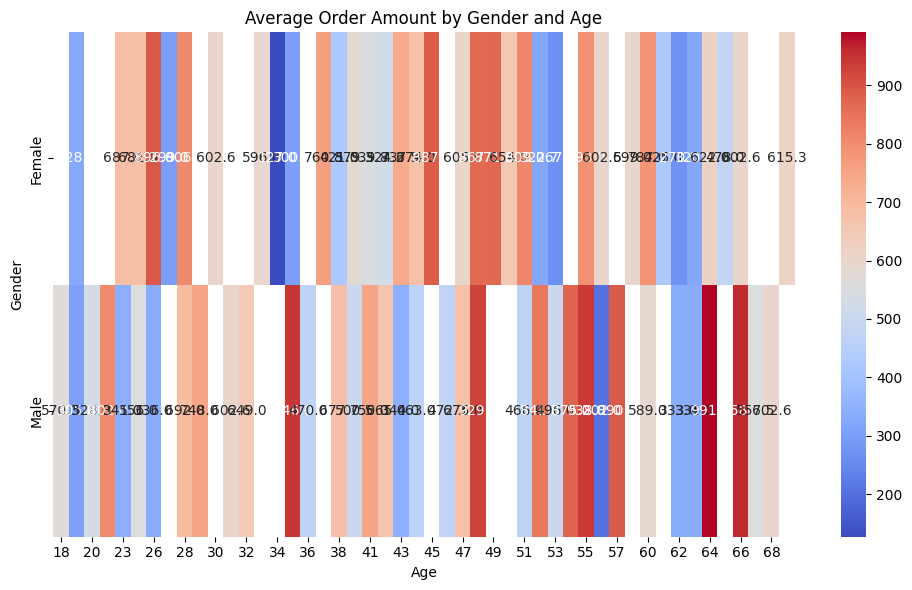

In [13]:
# 将分组结果转换为透视表
pivot_table = grouped_gender_age.unstack()

# 绘制热力图
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Order Amount by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

In [14]:
# 保存修改后的 DataFrame
df_merged.to_csv('merged_customer_orders.csv', index=False)

print("\n修改后的客户订单数据已保存为 merged_customer_orders.csv")


修改后的客户订单数据已保存为 merged_customer_orders.csv
